
# Ground station observations

This notebook will help you explore the ground station observations. Hundreds of observation stations are built throughout the French territory and fitted with several weather sensors (temperature, pressure, wind...). 
Each parameter is measured every 6 minutes and each file contains 1 month of data for each geographical area ('NW' for North-West of France and 'SE' for South-East of France). 

For more information, cf [documentation](https://meteofrance.github.io/meteonet/english/data/ground-observations/). 

## Data overview

### Metadata parameters

* **number_sta** : ground station number

* **lat** : latitude into decimal degrees

* **lon** : longitude into decimal degrees

* **height_sta** : station height into meters

The date parameter is a datetime object with the format 'YYYY-MM-DD HH:mm:ss'.

### Meteorological parameters

* **dd** : wind direction in degrees

* **ff** : wind speed in m.s<sup>-1</sup>

* **precip** : precipitation during the reporting period in kg.m<sup>2</sup>

* **hu** : humidity in %

* **td** : dew point temperature** in Kelvin

* **t** : temperature in Kelvin

* **psl** : pressure reduced to sea level in Pa


** : temperature for which it is needed to refresh an air volume at constant pressure and humidity to become it saturated (i.e. condensation temperature)

In [1]:
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

Select the zone, date and parameter you want to study :

In [2]:
zone, day, param = 'SE', '20160101', 'hu'
fname = "../../data_samples/ground_stations/"+zone+'_'+day+".csv"
df = pd.read_csv(fname,parse_dates=[4],infer_datetime_format=True)

Let's have a look at the dataframe !

In [3]:
display(df.head())
display(df.tail())

,number_sta,lat,lon,height_sta,date,dd,ff,precip,hu,td,t,psl
0,1027003,45.83,5.11,196.0,2016-01-01,NaN,NaN,NaN,98.0,278.75,279.05,NaN
1,1033002,46.09,5.81,350.0,2016-01-01,0.0,0.0,0.0,99.0,278.25,278.35,NaN
2,1034004,45.77,5.69,330.0,2016-01-01,0.0,0.0,0.0,100.0,279.15,279.15,NaN
3,1072001,46.20,5.29,260.0,2016-01-01,NaN,NaN,0.0,NaN,NaN,276.55,NaN
4,1089001,45.98,5.33,252.0,2016-01-01,0.0,0.0,0.0,95.0,278.85,279.55,102720.0


,number_sta,lat,lon,height_sta,date,dd,ff,precip,hu,td,t,psl
111618,84085004,43.94000,5.23000,488.0,2016-01-01 23:54:00,100.0,2.0,0.0,94.0,280.05,280.95,NaN
111619,84086001,43.81000,5.15000,672.0,2016-01-01 23:54:00,140.0,7.6,0.0,93.0,279.65,280.75,NaN
111620,84087001,44.14000,4.86000,55.0,2016-01-01 23:54:00,130.0,5.0,0.0,76.0,281.25,285.35,101760.0
111621,84107002,44.04067,5.49283,836.0,2016-01-01 23:54:00,120.0,3.8,0.2,99.0,278.55,278.65,NaN
111622,84150001,44.34000,4.91000,141.0,2016-01-01 23:54:00,110.0,3.1,0.0,82.0,281.85,284.85,NaN


## Plot a parameter for a given date 

Let's start by selecting a date and time and displaying a subpart of the dataframe.

In [4]:
date = '2016-01-01T06:00:00'
d_sub = df[df['date'] == date]

display(d_sub.head())
display(d_sub.tail())

,number_sta,lat,lon,height_sta,date,dd,ff,precip,hu,td,t,psl
28830,1027003,45.83,5.11,196.0,2016-01-01 06:00:00,NaN,NaN,NaN,99.0,276.45,276.55,NaN
28831,1033002,46.09,5.81,350.0,2016-01-01 06:00:00,360.0,0.5,0.0,99.0,276.25,276.35,NaN
28832,1034004,45.77,5.69,330.0,2016-01-01 06:00:00,360.0,1.2,0.0,100.0,277.15,277.15,NaN
28833,1072001,46.20,5.29,260.0,2016-01-01 06:00:00,NaN,NaN,0.0,NaN,NaN,272.95,NaN
28834,1089001,45.98,5.33,252.0,2016-01-01 06:00:00,40.0,1.2,0.0,97.0,276.75,277.15,102700.0


,number_sta,lat,lon,height_sta,date,dd,ff,precip,hu,td,t,psl
29291,84086001,43.81000,5.15000,672.0,2016-01-01 06:00:00,50.0,1.8,0.0,98.0,279.15,279.45,NaN
29292,84087001,44.14000,4.86000,55.0,2016-01-01 06:00:00,330.0,2.1,0.0,97.0,280.45,280.85,102470.0
29293,84094001,44.29000,5.13000,392.0,2016-01-01 06:00:00,0.0,0.0,0.0,95.0,278.65,279.35,NaN
29294,84107002,44.04067,5.49283,836.0,2016-01-01 06:00:00,260.0,1.3,0.0,98.0,275.65,275.95,NaN
29295,84150001,44.34000,4.91000,141.0,2016-01-01 06:00:00,20.0,2.0,0.0,95.0,279.95,280.75,NaN


Now, let's plot the data !

### Simple scatter plot

<IPython.core.display.Javascript object>


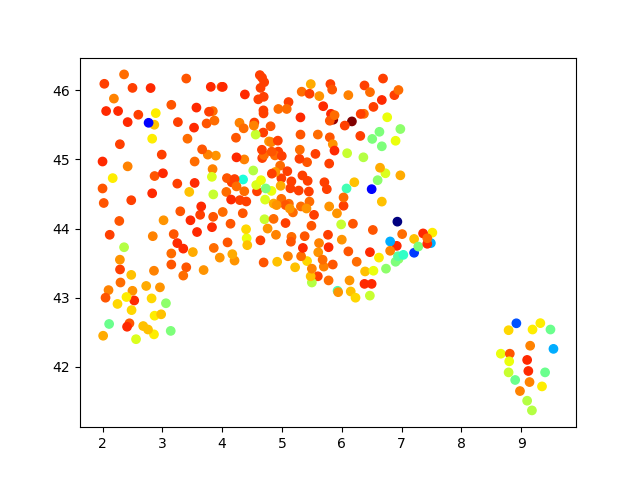

In [5]:
plt.scatter(d_sub['lon'], d_sub['lat'], c=d_sub[param], cmap='jet')
plt.show()

### Plot with Cartopy

In [6]:
from meteonet_toolbox.constant import DOMAINS
import cartopy.crs as ccrs
import cartopy.feature as cfeature

<IPython.core.display.Javascript object>


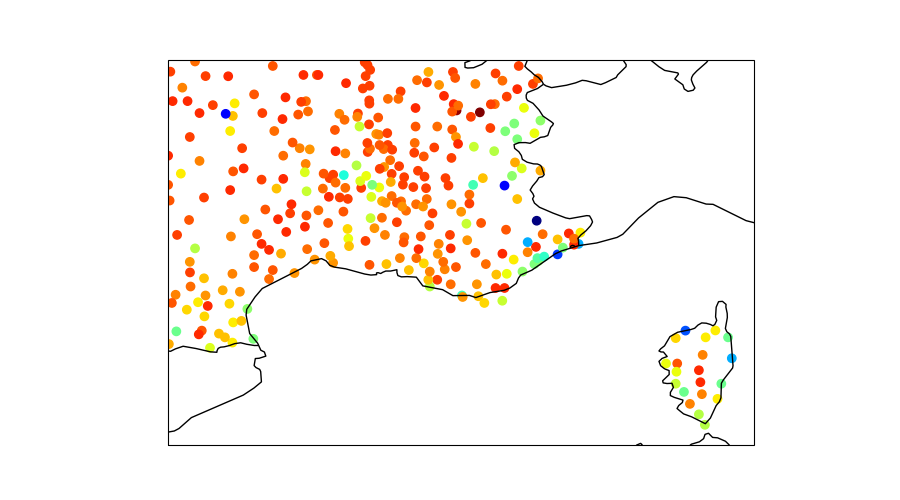

In [7]:
# Coordinates of studied area boundaries
lllat = DOMAINS[zone]['lry']  #lower left latitude
urlat = DOMAINS[zone]['uly']  #upper right latitude
lllon = DOMAINS[zone]['ulx']  #lower left longitude
urlon = DOMAINS[zone]['lrx']  #upper right longitude
extent = [lllon, urlon, lllat, urlat]

fig = plt.figure(figsize=(9,5))

# Select projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the data
plt.scatter(d_sub['lon'], d_sub['lat'], c=d_sub[param], cmap='jet')  # Plot

# Add coastlines and borders
ax.coastlines(resolution='50m', linewidth=1)
ax.add_feature(cfeature.BORDERS.with_scale('50m'))

# Show only the area we defined
ax.set_extent(extent)

plt.show()